In [1]:
# This code imports some libraries that I will need.

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import numpy as np
import time

# Pandas for overview
import pandas as pd

# TensorFlow and Keras for deep learning
import tensorflow as tf
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn import tree
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.metrics import ConfusionMatrixDisplay

# Plot setup
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=7)
mpl.rc('xtick', labelsize=6)
mpl.rc('ytick', labelsize=6)
mpl.rc('figure', dpi=240)
plt.close('all')

import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

In [33]:
pd.set_option('display.max_rows', 20)  # Display up to 500 rows
pd.set_option('display.max_columns', 150)  # Display up to 150 columns
pd.set_option('display.max_colwidth', None)  # Display full content of the cell

# 1. Initialization

## 1.1 Loading the data


In [34]:
df = pd.read_csv('./data/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## 1.2 Feature extraction

In [35]:
# Extract feature names
feature_names = df.columns[1:]
label_name = df.columns[0]

# Display the feature names and label name
print("Feature Names:", feature_names)
print("Label Name:", label_name)

Feature Names: Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Label Name: Pregnancies


## 1.3 Data info

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## 1.4 Data summary

In [37]:
# Describe columns
summary = df.describe(percentiles = [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95])
summary

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
5%,0.000000,79.000000,38.700000,0.000000,0.000000,21.800000,0.140350,21.000000,0.000000
10%,0.000000,85.000000,54.000000,0.000000,0.000000,23.600000,0.165000,22.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
90%,9.000000,167.000000,88.000000,40.000000,210.000000,41.500000,0.878600,51.000000,1.000000


# 2. Exploratory Data Analysis

## 2.1 Finding null and zero values

In [38]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [39]:
zero_values = (df == 0).sum()
print(zero_values)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


## 2.2 Visualization of data to find outliers

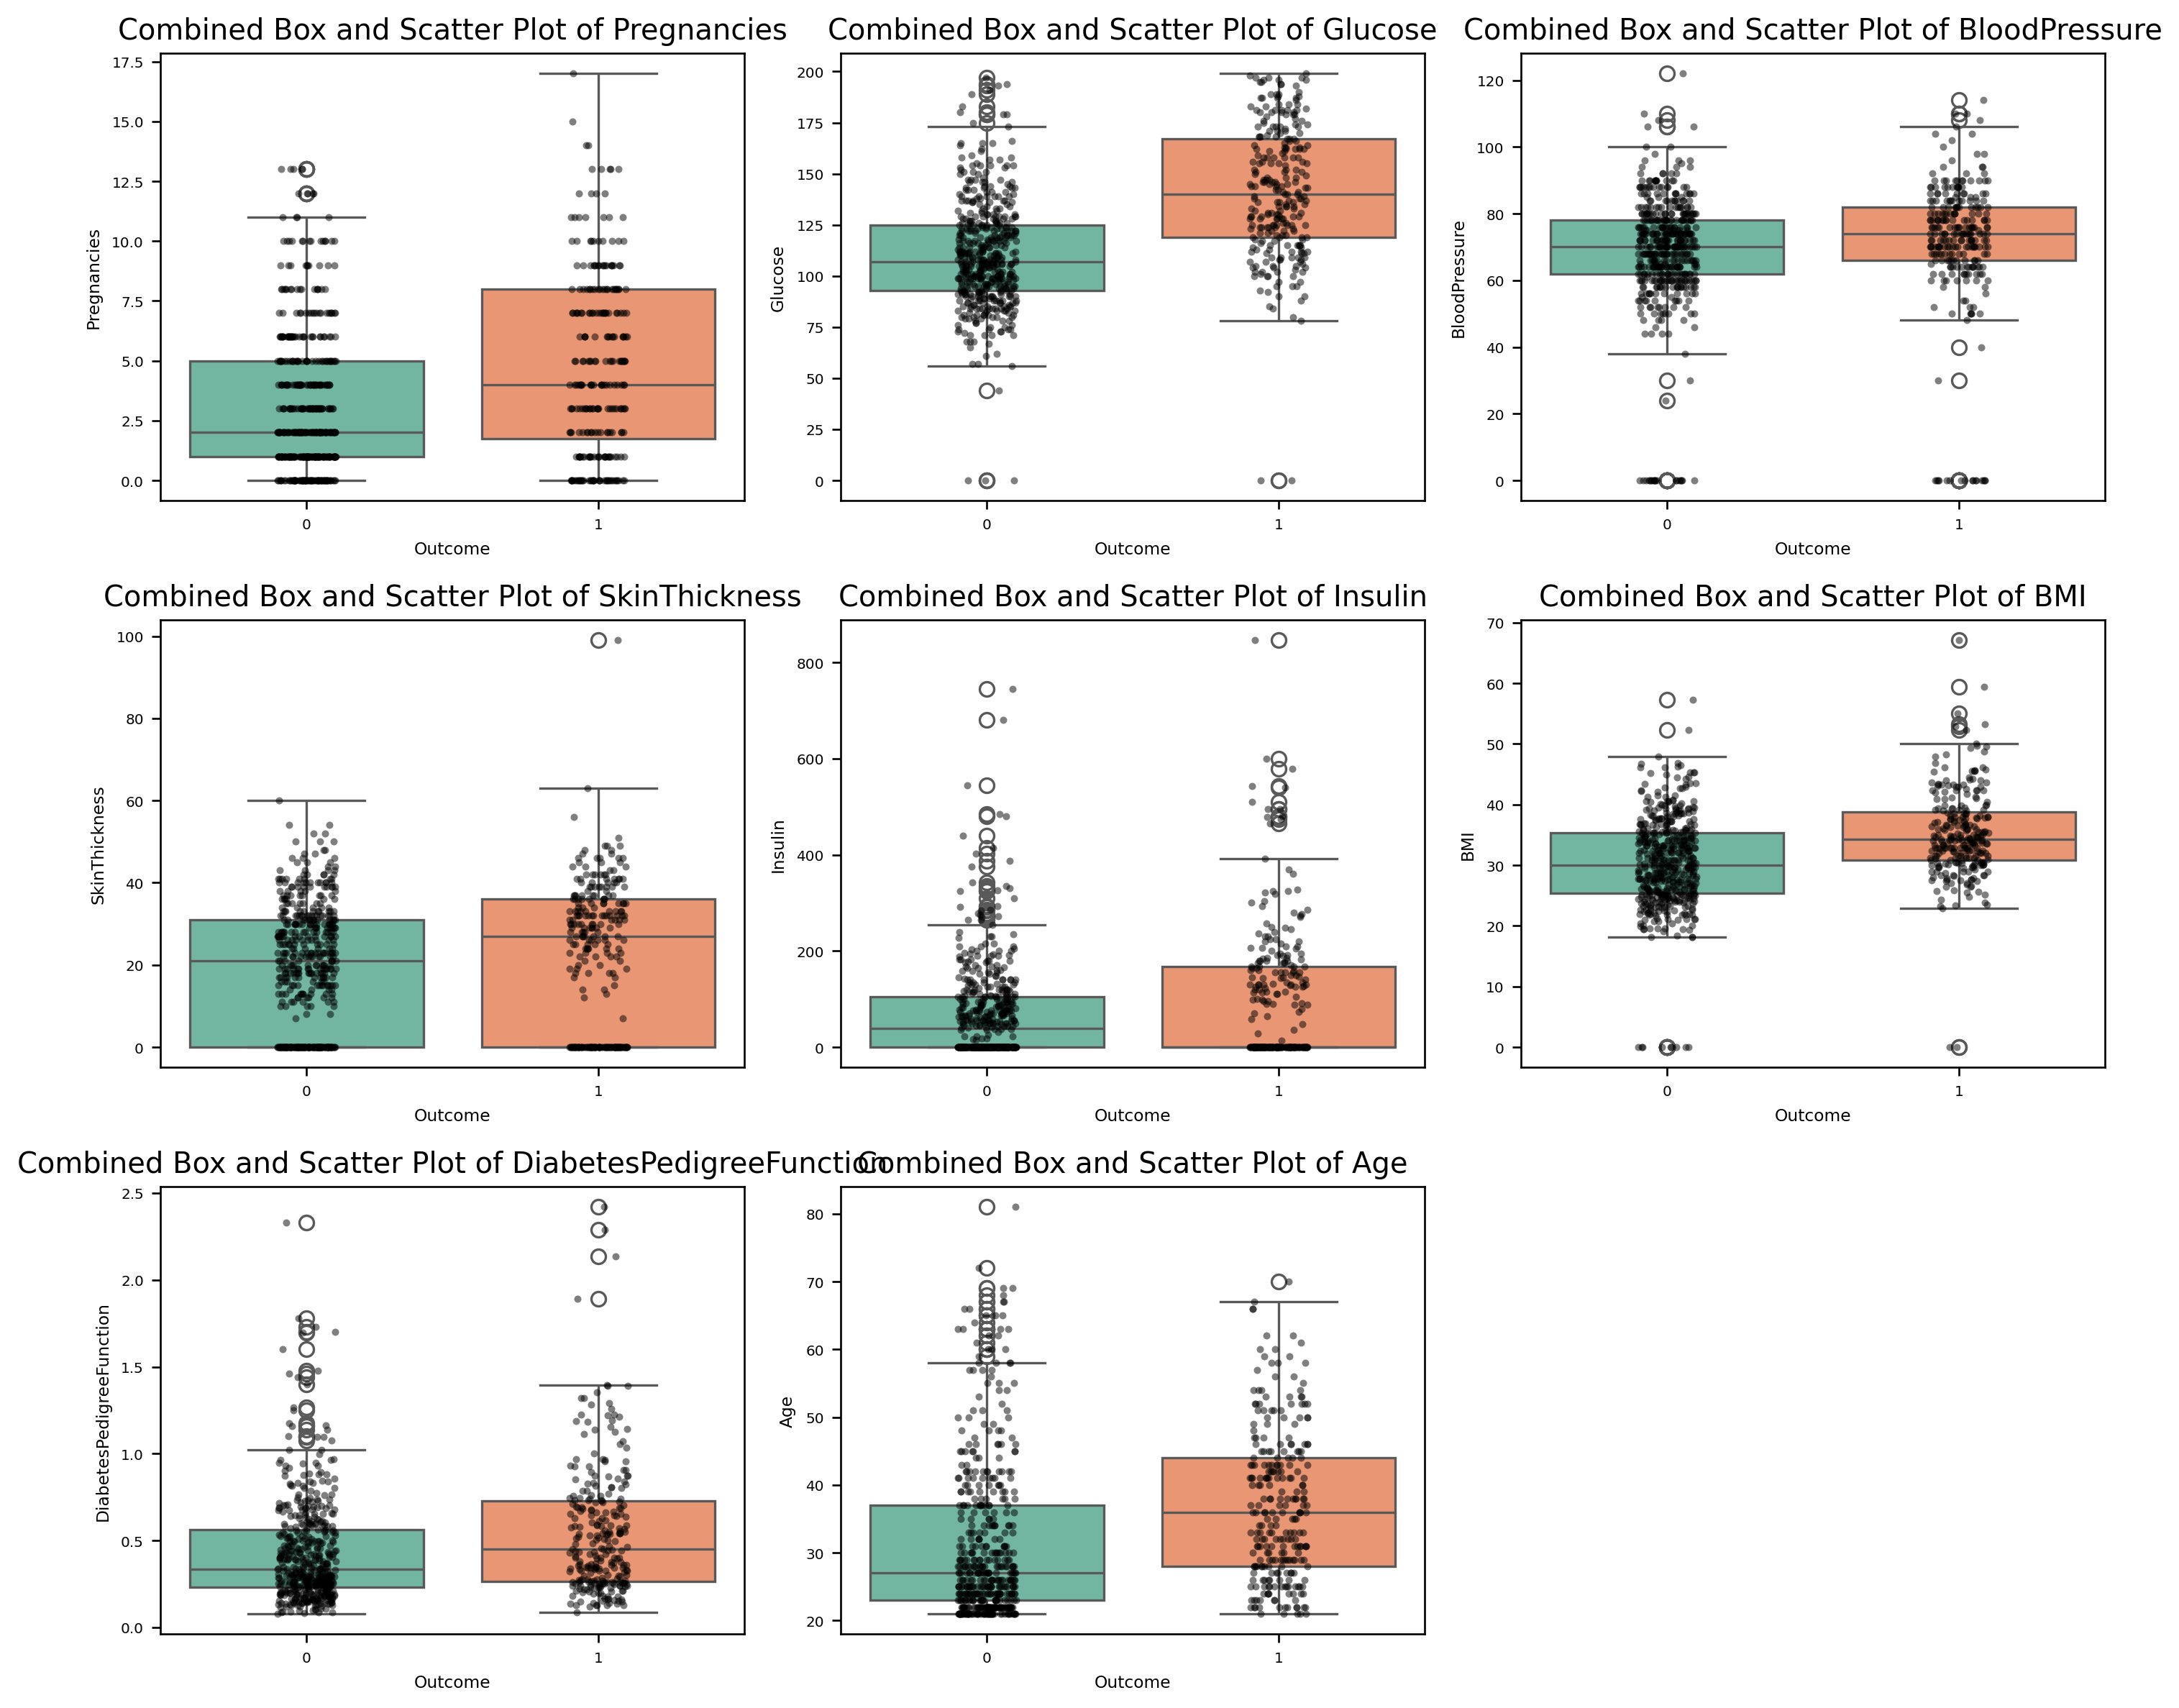

In [40]:
# List of features to plot (excluding the label/target column)
features = df.columns[:-1]  # Assuming the last column is the target

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Loop through the features and create combined box and scatter plots
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)  # Adjust the grid based on the number of features
    sns.boxplot(data=df, x='Outcome', y=feature, palette="Set2")  # Box plot
    sns.stripplot(data=df, x='Outcome', y=feature, color='black', alpha=0.5, jitter=True, size=3)  # Scatter plot on top
    plt.title(f"Combined Box and Scatter Plot of {feature}")
    plt.tight_layout()

plt.show()

## 2.3 Outliers identification and cleaning

### 2.3.1 Glucose

In [41]:
# Replace zero values in the 'Glucose' column with NaN
df['Glucose'].replace(0, np.nan, inplace=True)

# Verify that the replacement worked
print(df['Glucose'].isnull().sum())  # This will show how many NaN values are now in the Glucose column

5


### 2.3.2 Blood Pressure

In [42]:
# Replace zero values in the 'BloodPressure' column with NaN
df['BloodPressure'].replace(0, np.nan, inplace=True)

# Verify that the replacement worked
print(df['BloodPressure'].isnull().sum())  # This will show how many NaN values are now in the BloodPressure column

35


### 2.3.3 Skin Thickness

In [43]:
# Replace zero values and values greater than 65 in the 'SkinThickness' column with NaN
df.loc[(df['SkinThickness'] == 0) | (df['SkinThickness'] > 65), 'SkinThickness'] = np.nan

# Verify that the replacement worked
print(df['SkinThickness'].isnull().sum())  # This will show how many NaN values are now in the SkinThickness column

228


### 2.3.4 Insulin

In [44]:
# Replace zero values and values greater than 650 in the 'Insulin' column with NaN
df.loc[(df['Insulin'] == 0) | (df['Insulin'] > 650), 'Insulin'] = np.nan

# Verify that the replacement worked
print(df['Insulin'].isnull().sum())  # This will show how many NaN values are now in the Insulin column

377


### 2.3.5 BMI

In [45]:
# Replace zero values in the 'BMI' column with NaN
df['BMI'].replace(0, np.nan, inplace=True)

# Verify that the replacement worked
print(df['BMI'].isnull().sum())  # This will show how many NaN values are now in the BMI column

11


## 2.4 Visualization of cleaned data

In [46]:
# Describe columns
summary = df.describe(percentiles = [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95])
summary

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,540.000000,391.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.024074,150.936061,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.045046,106.674215,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
5%,0.000000,80.000000,52.000000,13.000000,41.500000,22.200000,0.140350,21.000000,0.000000
10%,0.000000,86.200000,58.000000,16.000000,50.000000,24.000000,0.165000,22.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,189.000000,36.600000,0.626250,41.000000,1.000000
90%,9.000000,167.000000,88.000000,42.000000,285.000000,41.620000,0.878600,51.000000,1.000000


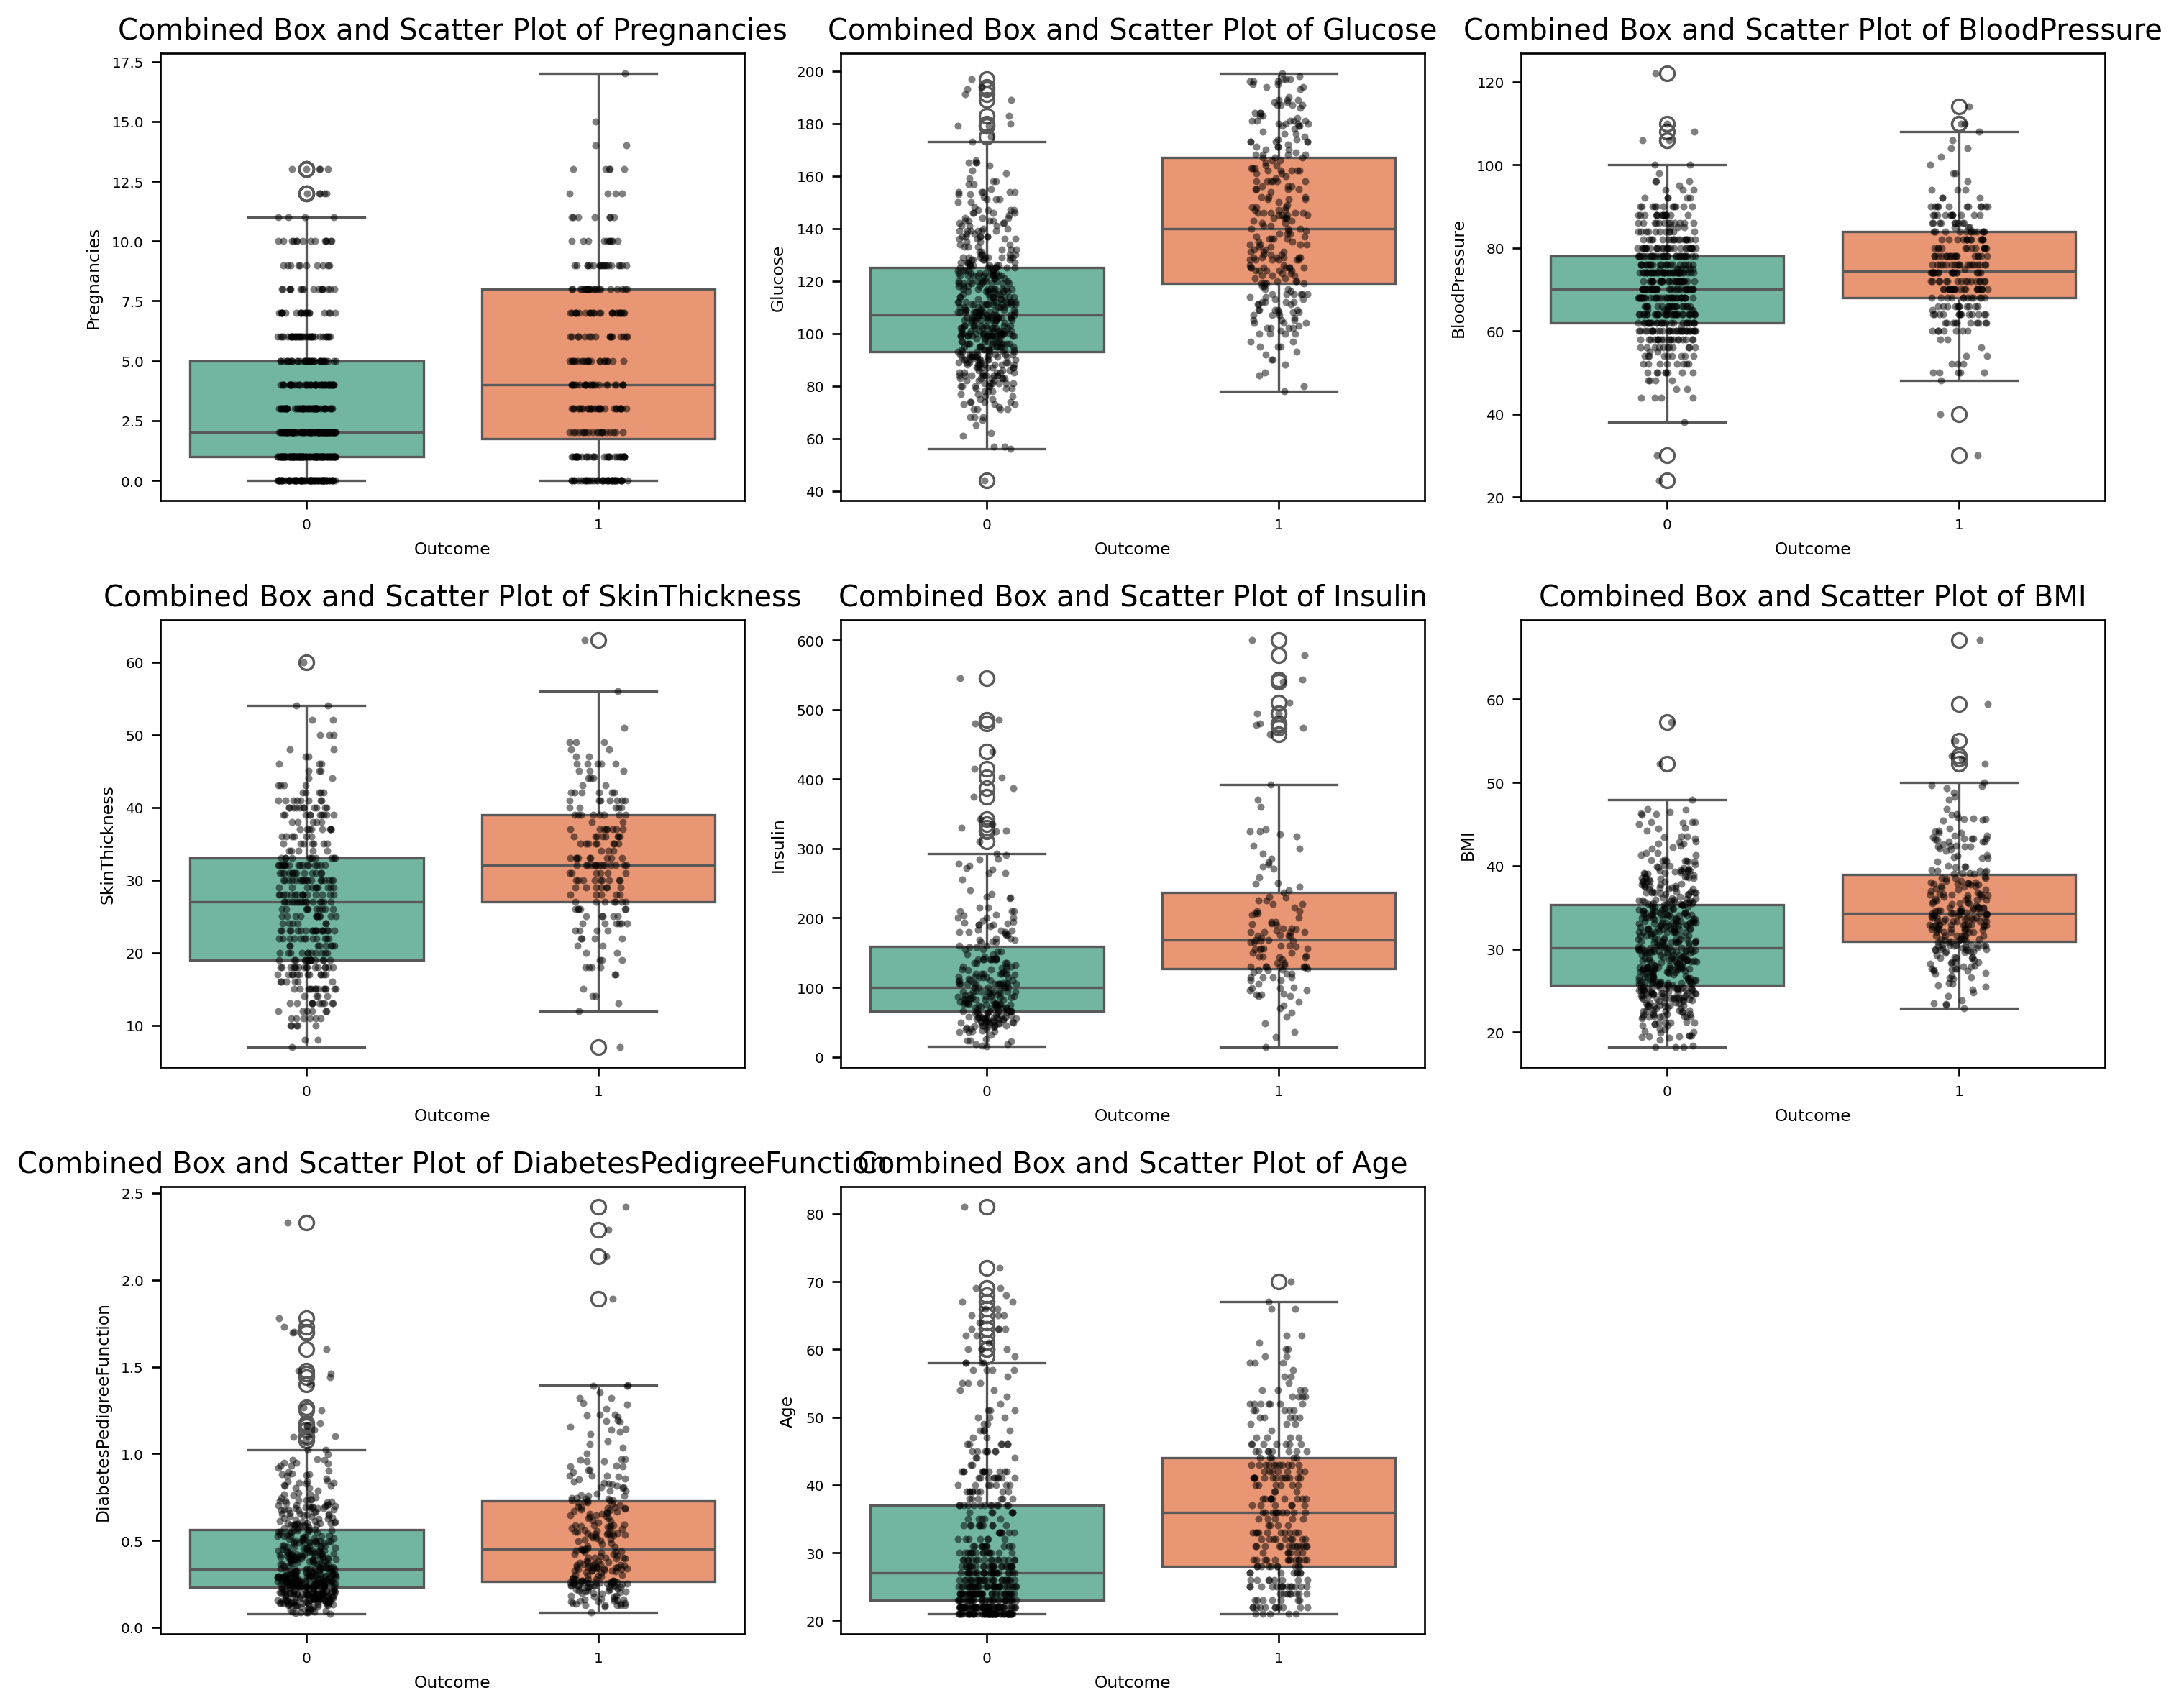

In [47]:
# List of features to plot (excluding the label/target column)
features = df.columns[:-1]  # Assuming the last column is the target

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Loop through the features and create combined box and scatter plots
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)  # Adjust the grid based on the number of features
    sns.boxplot(data=df, x='Outcome', y=feature, palette="Set2")  # Box plot
    sns.stripplot(data=df, x='Outcome', y=feature, color='black', alpha=0.5, jitter=True, size=3)  # Scatter plot on top
    plt.title(f"Combined Box and Scatter Plot of {feature}")
    plt.tight_layout()

plt.show()

# 3. Baseline Model

## 3.1 Preprocessing pipeline

### 3.1.1 Spliting the data

In [48]:
# Separate the features and target
X = df.drop('Outcome', axis=1)  # Assuming 'Outcome' is the target column
y = df['Outcome']

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Further split train set into training and validation sets (75% train, 25% validation from the 80% train)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)


### 3.1.2 Imputation and scaling of data

In [49]:
# Build the preprocessing pipeline
preprocessing_pipeline = Pipeline(steps=[
    ('imputer', IterativeImputer()),  # MICE imputer for missing values
    ('scaler', StandardScaler())  # Standardize the features
])

# Apply the pipeline to the training, validation, and test data
X_train_processed = preprocessing_pipeline.fit_transform(X_train)
X_val_processed = preprocessing_pipeline.transform(X_val)
X_test_processed = preprocessing_pipeline.transform(X_test)

In [50]:
# Display the shapes of the processed datasets
print("Training set shape:", X_train_processed.shape)
print("Validation set shape:", X_val_processed.shape)
print("Test set shape:", X_test_processed.shape)

Training set shape: (460, 8)
Validation set shape: (154, 8)
Test set shape: (154, 8)


## 3.2 Perceptron model

### 3.2.1 Model creation

In [51]:
# Create the Perceptron Model
perceptron_model = Sequential([
    Dense(1, activation='sigmoid', input_shape=(X_train_processed.shape[1],))  # Single neuron for binary classification
])

# Compile the Model
perceptron_model.compile(optimizer='adam',  # Adam optimizer
                         loss='binary_crossentropy',  # Loss function for binary classification
                         metrics=['accuracy'])

# Add Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

### 3.2.2 Train and evaluation

In [52]:
# Train the Model
history = perceptron_model.fit(X_train_processed, y_train,  # Training data
                               validation_data=(X_val_processed, y_val),  # Validation data
                               epochs=100,  # Set a maximum number of epochs
                               batch_size=32,  # Batch size
                               callbacks=[early_stopping])  # Early stopping callback

# Evaluate the Model on the Validation Set
val_loss, val_accuracy = perceptron_model.evaluate(X_val_processed, y_val)

Epoch 1/100


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3503 - loss: 0.7851 - val_accuracy: 0.3052 - val_loss: 0.7914
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3459 - loss: 0.7780 - val_accuracy: 0.3377 - val_loss: 0.7699
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3942 - loss: 0.7579 - val_accuracy: 0.3961 - val_loss: 0.7504
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - accuracy: 0.4112 - loss: 0.7492 - val_accuracy: 0.4286 - val_loss: 0.7316
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - accuracy: 0.4563 - loss: 0.7365 - val_accuracy: 0.4610 - val_loss: 0.7147
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.5165 - loss: 0.7077 - val_accuracy: 0.5130 - val_loss: 0.6983
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.5720 - loss: 0.6943 - val_accuracy: 0.5390 - val_loss: 0.6833
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.5675 - loss: 0.6918 - val_accuracy: 0.5714 - va

### 3.2.3 Result

In [53]:
# Display the validation accuracy
print(f"Validation Accuracy: {val_accuracy:.4f}")

Validation Accuracy: 0.8117


## 3.3 Model performance

### 3.3.1 Performance metrics

In [54]:
# Generate Predictions on the Validation Set
y_val_pred_proba = perceptron_model.predict(X_val_processed)  # Predict probabilities
y_val_pred = (y_val_pred_proba > 0.5).astype(int)  # Convert probabilities to binary predictions

# Define custom F-beta scorer functions
def f10_score(yt, yp):
    return fbeta_score(yt, yp, beta=10)

def f01_score(yt, yp):
    return fbeta_score(yt, yp, beta=0.1)

# Calculate Performance Metrics
accuracy = accuracy_score(y_val, y_val_pred)
balanced_accuracy = balanced_accuracy_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
auc = roc_auc_score(y_val, y_val_pred_proba)
f1 = f1_score(y_val, y_val_pred)
f_beta_0_1 = f01_score(y_val, y_val_pred)
f_beta_10 = f10_score(y_val, y_val_pred)

# Step 7: Display the Metrics
print("Accuracy:", accuracy)
print("Balanced Accuracy:", balanced_accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("AUC:", auc)
print("F1 Score:", f1)
print("F-beta Score (beta=0.1):", f_beta_0_1)
print("F-beta Score (beta=10):", f_beta_10)

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x32bec7880> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Accuracy: 0.8116883116883117
Balanced Accuracy: 0.7612962962962964
Recall: 0.5925925925925926
Precision: 0.8205128205128205
AUC: 0.8720370370370372
F1 Score: 0.6881720430107527
F-beta Score (beta=0.1): 0.8

### 3.3.2 Confusion matrix

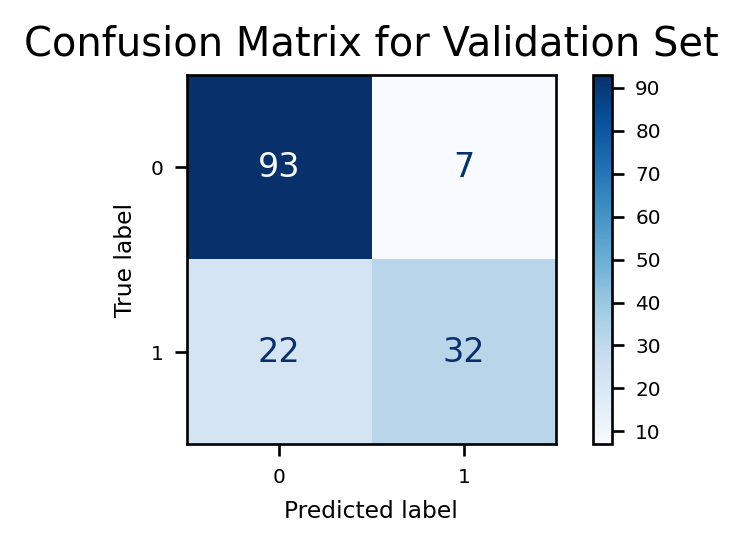

In [55]:
#  Generate and Plot the Confusion Matrix with Custom Size
cm = confusion_matrix(y_val, y_val_pred)
fig, ax = plt.subplots(figsize=(4, 2))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, ax=ax)  # Pass the custom axis to the plot
plt.title('Confusion Matrix for Validation Set')
plt.show()

# 4. Hyper-parameter optimization

## 4.1 Manual optimization

### 4.1.1 Learning rate

In [56]:
def train_perceptron_learning_rate(learning_rate):
    perceptron_model = Sequential([
        Dense(1, activation='sigmoid', input_shape=(X_train_processed.shape[1],))
    ])
    
    perceptron_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                             loss='binary_crossentropy',
                             metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = perceptron_model.fit(X_train_processed, y_train,
                                   validation_data=(X_val_processed, y_val),
                                   epochs=100,
                                   batch_size=32,
                                   callbacks=[early_stopping],
                                   verbose=0)
    
    val_loss, val_accuracy = perceptron_model.evaluate(X_val_processed, y_val, verbose=0)
    
    return {'params': {'learning_rate': learning_rate}, 'val_accuracy': val_accuracy}

### 4.1.2 Batch size

In [57]:
def train_perceptron_batch_size(batch_size):
    perceptron_model = Sequential([
        Dense(1, activation='sigmoid', input_shape=(X_train_processed.shape[1],))
    ])
    
    perceptron_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                             loss='binary_crossentropy',
                             metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = perceptron_model.fit(X_train_processed, y_train,
                                   validation_data=(X_val_processed, y_val),
                                   epochs=100,
                                   batch_size=batch_size,
                                   callbacks=[early_stopping],
                                   verbose=0)
    
    val_loss, val_accuracy = perceptron_model.evaluate(X_val_processed, y_val, verbose=0)
    
    return {'params': {'batch_size': batch_size}, 'val_accuracy': val_accuracy}

### 4.1.3 Epochs

In [58]:
def train_perceptron_epochs(epochs):
    perceptron_model = Sequential([
        Dense(1, activation='sigmoid', input_shape=(X_train_processed.shape[1],))
    ])
    
    perceptron_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                             loss='binary_crossentropy',
                             metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = perceptron_model.fit(X_train_processed, y_train,
                                   validation_data=(X_val_processed, y_val),
                                   epochs=epochs,
                                   batch_size=32,
                                   callbacks=[early_stopping],
                                   verbose=0)
    
    val_loss, val_accuracy = perceptron_model.evaluate(X_val_processed, y_val, verbose=0)
    
    return {'params': {'epochs': epochs}, 'val_accuracy': val_accuracy}

### 4.1.4 Early stopping

In [59]:
def train_perceptron_early_stopping(patience):
    perceptron_model = Sequential([
        Dense(1, activation='sigmoid', input_shape=(X_train_processed.shape[1],))
    ])
    
    perceptron_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                             loss='binary_crossentropy',
                             metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)

    history = perceptron_model.fit(X_train_processed, y_train,
                                   validation_data=(X_val_processed, y_val),
                                   epochs=100,
                                   batch_size=32,
                                   callbacks=[early_stopping],
                                   verbose=0)
    
    val_loss, val_accuracy = perceptron_model.evaluate(X_val_processed, y_val, verbose=0)
    
    return {'params': {'patience': patience}, 'val_accuracy': val_accuracy}

## 4.2 Extract the best parameter and validation accuracy

In [60]:
# Test different values for each hyperparameter
learning_rates = [0.1, 0.01, 0.001, 0.0001]
batch_sizes = [16, 32, 64, 128]
epochs_list = [50, 100, 150, 200]
patience_values = [5, 10, 15, 20]

# Store results
all_results = []

# Learning rate tuning
for lr in learning_rates:
    result = train_perceptron_learning_rate(lr)
    all_results.append(result)

# Batch size tuning
for bs in batch_sizes:
    result = train_perceptron_batch_size(bs)
    all_results.append(result)

# Epochs tuning
for ep in epochs_list:
    result = train_perceptron_epochs(ep)
    all_results.append(result)

# Early stopping patience tuning
for patience in patience_values:
    result = train_perceptron_early_stopping(patience)
    all_results.append(result)
    
# Define the function to choose the best score
def choose_best_score(results):
    """
    This function accepts a list of results from hyperparameter tuning experiments and returns the 
    best validation accuracy along with the corresponding hyperparameters.
    
    Parameters:
        results (list): A list of dictionaries, each containing 'val_accuracy' and 'params' keys.
        
    Returns:
        dict: A dictionary with the best validation accuracy and corresponding hyperparameters.
    """
    best_result = None
    best_accuracy = 0
    
    # Loop through the results to find the best one
    for result in results:
        val_accuracy = result['val_accuracy']
        
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_result = result
    
    return best_result

# Find the best result
best_result = choose_best_score(all_results)

# Display the best result
print("Best Validation Accuracy:", best_result['val_accuracy'])
print("Best Hyperparameters:", best_result['params'])

Best Validation Accuracy: 0.8116883039474487
Best Hyperparameters: {'learning_rate': 0.001}


# 5. Final outcome

## 5.1 Model with the best hyper-parameter

In [61]:
# Function to retrain the best model and evaluate on the test set
def evaluate_best_model_on_test(best_params):
    # Create the Perceptron model
    perceptron_model = Sequential([
        Dense(1, activation='sigmoid', input_shape=(X_train_processed.shape[1],))
    ])
    
    # Compile the model with the best hyperparameters
    perceptron_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=best_params.get('learning_rate', 0.001)),
                             loss='binary_crossentropy',
                             metrics=['accuracy'])

    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=best_params.get('patience', 10), restore_best_weights=True)

    # Retrain the model on the training set and validate on the validation set during training
    perceptron_model.fit(X_train_processed, y_train,
                         validation_data=(X_val_processed, y_val),
                         epochs=best_params.get('epochs', 100),
                         batch_size=best_params.get('batch_size', 32),
                         callbacks=[early_stopping],
                         verbose=0)

    # Predict probabilities and binary outcomes on the test set
    y_test_pred_proba = perceptron_model.predict(X_test_processed)
    y_test_pred = (y_test_pred_proba > 0.5).astype(int)

    # Performance metrics for the test set
    accuracy = accuracy_score(y_test, y_test_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    auc = roc_auc_score(y_test, y_test_pred_proba)
    f1 = f1_score(y_test, y_test_pred)
    f_beta_0_1 = fbeta_score(y_test, y_test_pred, beta=0.1)
    f_beta_10 = fbeta_score(y_test, y_test_pred, beta=10)

    # Display all performance metrics
    print("Performance Metrics for Test Set:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"AUC: {auc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"F-beta Score (beta=0.1): {f_beta_0_1:.4f}")
    print(f"F-beta Score (beta=10): {f_beta_10:.4f}")

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    fig, ax = plt.subplots(figsize=(4, 2))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues, ax=ax)
    plt.title('Confusion Matrix for Test Set')
    plt.show()

# Assume 'best_result' was found from the previous hyperparameter tuning process
best_params = best_result['params']

## 5.2 Final performance metrics

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Performance Metrics for Test Set:
Accuracy: 0.7273
Balanced Accuracy: 0.6835
Recall: 0.5370
Precision: 0.6304
AUC: 0.8130
F1 Score: 0.5800
F-beta Score (beta=0.1): 0.6294
F-beta Score (beta=10): 0.5378


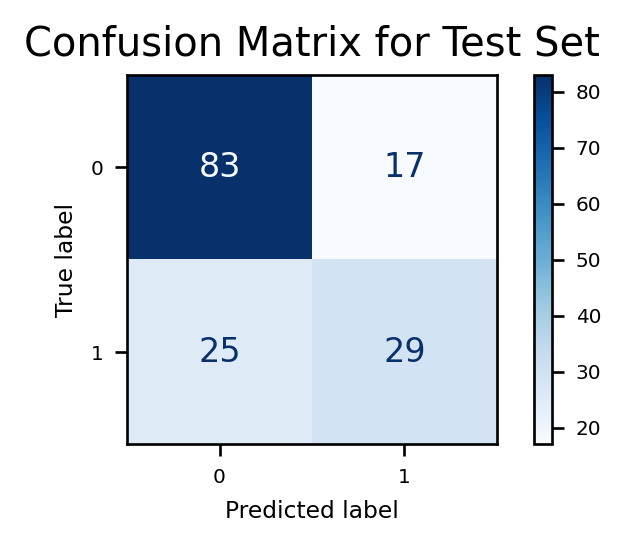

In [62]:
# Evaluate the best model on the test set and display metrics
evaluate_best_model_on_test(best_params)

#